<a href="https://colab.research.google.com/github/sterlinggutterman/Capstone/blob/main/Neural_Networks_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MI3 script containing code for neural networks analysis.

In [ ]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 988, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 988 (delta 29), reused 7 (delta 7), pack-reused 918 (from 2)
Receiving objects: 100% (988/988), 11.58 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (345/345), done.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/DS4002/Project_2/DATA/impute_df.csv')
df.head()

,UTC Timestamp (Interval Ending),MISO Total Actual Load (MW),Indianapolis Temperature (Fahrenheit),Minneapolis Temperature (Fahrenheit),New Orleans International Airport Temperature (Fahrenheit),MISO Total Wind Generation (MW),GDP
0,2021-02-10 06:00:00,77859.97,19.9,0.0,64.0,5376.71,3.478772e+06
1,2021-02-10 07:00:00,76211.10,19.9,-0.9,63.0,5019.58,3.478798e+06
2,2021-02-10 08:00:00,75295.06,19.9,-4.0,63.0,4895.51,3.478824e+06
3,2021-02-10 09:00:00,75164.21,19.9,-2.0,63.0,4747.13,3.478850e+06
4,2021-02-10 10:00:00,75743.83,19.9,-2.0,62.1,4341.06,3.478876e+06


### Neural Network

In [ ]:
import keras.models
import keras.layers
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting features and target variable
features = ['Indianapolis Temperature (Fahrenheit)',
            'Minneapolis Temperature (Fahrenheit)',
            'New Orleans International Airport Temperature (Fahrenheit)',
            'MISO Total Wind Generation (MW)',
            'GDP']
target = 'MISO Total Actual Load (MW)'

X = df[features]
y = df[target]

In [ ]:
# set up
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

labels = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=100) # Train-test split

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# model
# 1. Design neural network architecture:
net = Sequential()
net.add(Dense(units=61, activation='relu', kernel_initializer='he_uniform'))
net.add(Dense(units=5, activation='relu', kernel_initializer='he_uniform'))
net.add(Dense(units=1, activation='linear'))

# 2. network compilation:
net.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

# 3. Fit the network:
net.fit(X_train, y_train,
        epochs=10,
        batch_size=16,
        verbose=1,
        validation_data=(X_test, y_test))

Epoch 1/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 5823542272.0000 - mae: 75419.3438 - val_loss: 5420833280.0000 - val_mae: 72821.5391
Epoch 2/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 5024956416.0000 - mae: 70085.1484 - val_loss: 3535557888.0000 - val_mae: 58861.8086
Epoch 3/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2914054144.0000 - mae: 53051.6914 - val_loss: 1359216384.0000 - val_mae: 35037.0195
Epoch 4/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1012052800.0000 - mae: 29033.7188 - val_loss: 489807264.0000 - val_mae: 18761.2812
Epoch 5/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 422762848.0000 - mae: 17220.3438 - val_loss: 333163936.0000 - val_mae: 15350.6943
Epoch 6/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 295437216.0000 - mae: 14300.3320 - val_loss: 219347552.0000 - val_mae: 12191.7295
Epoch 7/10
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 189923824.0000 - mae: 11099.6953 - val_loss: 131488696.0000 - v

Takeaways
- loss and MAE steadily decreases
- gap between training and validation narrows
- model performance stabilizes around epoch 10

In [ ]:
net.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 61)                  │             366 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 5)                   │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,048 (8.00 KB)

 Trainable params: 682 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,366 (5.34 KB)

In [ ]:
score = net.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {score[0]}")
print(f"Test MAE: {score[1]}")

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 59073816.0000 - mae: 6113.3135
Test Loss (MSE): 58398756.0
Test MAE: 6064.66552734375


In [ ]:
# MSE value
mse = 58398756.0

# RMSE calculation
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 7641.91


Takeaways
- high loss value at the start
- model's predictions are off by ~7642 units
- test loss is similar to final training loss indicating a consistent performance on different sets

### Visualization

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


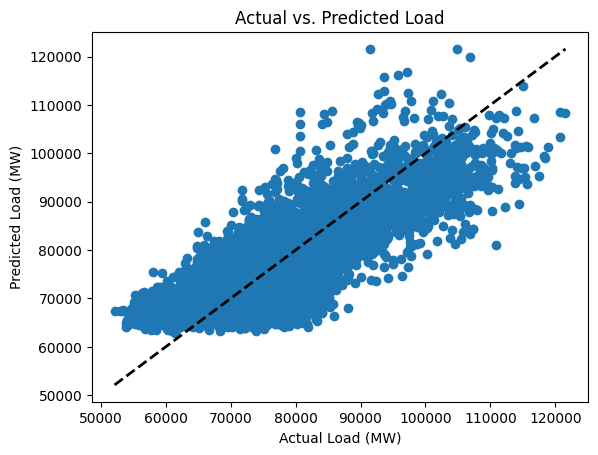

In [ ]:
import matplotlib.pyplot as plt

y_pred = net.predict(X_test)

# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Load (MW)")
plt.ylabel("Predicted Load (MW)")
plt.title("Actual vs. Predicted Load")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

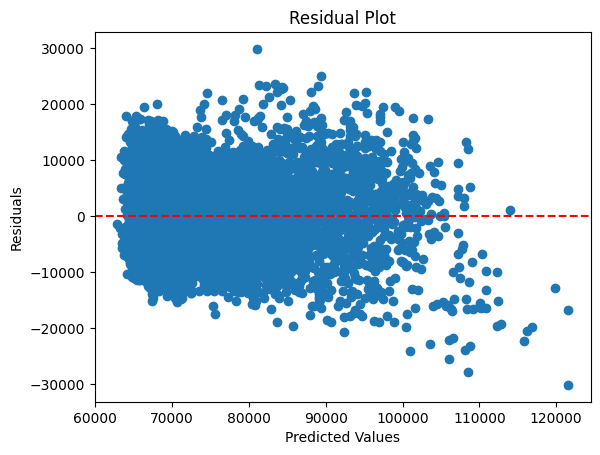

In [ ]:
# residuals
residuals = y_test - y_pred.flatten()

# plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()